In [1]:
import glob
import numpy as np
from matplotlib import pyplot as plt 
import os 
import pickle 
import regex as re

from family_model_intergenerational_marriage import *
# from family_model_intergenerational_marriage_reduced import * 
from get_model_parameters import separate_parts

In [94]:
alpha=0.65
# temp = 'cycle_basis_ver1'
# temp = 'cycle_basis_ver1_reduced'
# temp = 'cycle_basis_ver2'
temp = 'cycle_basis_ver2_connected'
in_dir = os.path.join(temp, 'pickle_files')
network_pattern = re.compile('^.*(?=(_configuration|_model|_target))')
if not os.path.exists(os.path.join(temp, 'histograms')):
    os.makedirs(os.path.join(temp, 'histograms'))

In [96]:
pickle_lists = glob.glob(in_dir+'/*')
# file_names = [k[33:] for k in pickle_lists]# for old runs
# file_names = [k[30:] for k in pickle_lists]  # for cycle_basis_ver1

# file_names = [k[38:] for k in pickle_lists]  # for cycle_basis_ver1_reduced
file_names = [k[40:] for k in pickle_lists]  # for cycle_basis_ver1, ver2 connected

file_names = [network_pattern.match(k).group(0) for k in file_names]
file_names = sorted(list(set(file_names)))

In [97]:
sorted(file_names)

['achuar_huasaga_chankuap',
 'achuar_pastaza',
 'ainu_1880_as01',
 'alyawarra_1971_au01',
 'anuta_1972',
 'arara',
 'arawete',
 'ayd_nl_yoruk_2005',
 'baruya',
 'candoshi',
 'chenchu_1940_as02',
 'chuukese_1947_1940',
 'dogrib_1911_25_59_nd04',
 'igluligmiut_1961_nu07',
 'kaingang',
 'kelkummer',
 'manus_1929',
 'netsilik_1922_nu09',
 'nobles_ile-de-france_1000-1440',
 'nucoorilma_tingha',
 'nunivak',
 'obidos',
 'ojibwa_1930_nd07',
 'ojibwa_1949_nd08',
 'pakaa_nova',
 'parakana',
 'pul_eliya_1954_simpler_version',
 'sarmi',
 'saudi_royal_genealogy',
 'surui',
 'tikar',
 'tikopia_1930',
 'tikuna-arara',
 'tiwi',
 'tlingit',
 'todas',
 'top_of_the_mountain',
 'torres_strait',
 'torshan',
 'tory',
 'trio_1960s',
 'us-presidents',
 'vedda_1905_as04',
 'waimiri-atroari',
 'wilcania',
 'yaraldi']

## Run this cell to save figures like those is chapter 6
### make sure that the list of file_names above is just the real-world network names (comment/uncomment as appropriate in the above cells

In [98]:
for name in file_names:
    with open(os.path.join(in_dir, name + '_configuration_cycle_KL_div.pkl'),'rb') as f:
        configuation_KL = pickle.load(f)

    with open(os.path.join(in_dir, name + '_model_cycle_KL_div.pkl'), 'rb') as f:
        tm_KL = pickle.load(f)

    fig = plt.figure(figsize=(6,4), dpi=300)
    plt.hist(configuation_KL, color='maroon', label='configuration model', alpha=alpha )
    plt.hist(tm_KL, color='#ff7f0e', label='target model', alpha=alpha)
    plt.semilogx()
    plt.legend() 
    plt.xlabel('log scale KL divergence')
    if name == 'kelkummer':
        plt.title(f'KL Divergence in Distribution of Length of Cycles \n in Kel Kummer Cycle Basis')
    elif name == 'torshan':
        plt.title(f'KL Divergence in Distribution of Length of Cycles \n in Torshan Cycle Basis')
    else:
        plt.title(f'KL Divergence in Distribution of Length of Cycles \n in {name} Cycle Basis')
    plt.savefig(os.path.join(temp, 'histograms', f'{name}_cycle_basis_KL_{temp}.png'), format='png')
    plt.close(fig)
    
    with open(os.path.join(in_dir, name + '_model_cycle_lengths.pkl'), 'rb') as f:
        tm_cycle_lengths = pickle.load(f)
    with open(os.path.join(in_dir, name + '_configuration_cycle_lengths.pkl'), 'rb') as f:
        configuration_cycle_lengths = pickle.load(f)
    with open(os.path.join(in_dir, name + '_target_cycle_lengths.pkl'), 'rb') as f:
        target_cycle_lengths = pickle.load(f)
        
    #     fig = plt.figure(figsize=(6,4), dpi=300)
    #     plt.hist(configuration_cycle_lengths[0], alpha=alpha, color='maroon', label='configuration model')
    #     plt.hist(tm_cycle_lengths[0], alpha=alpha, color='#ff7f0e', label='target model')
    #     plt.hist(target_cycle_lengths, alpha=alpha, color='#1f77b4', label='target')
    #     plt.semilogx()
    #     plt.legend()
    #     plt.xlabel(f'log scale cycle length')
    #     plt.title(f'Distribution of Length of Cycles \n in {name} Cycle Basis')
    #     plt.savefig(os.path.join(temp, 'histograms', f'{name}_cycle_basis_lengths.png'), format='png')
    #     plt.close(fig)
    
    fig = plt.figure(figsize=(6,4), dpi=300)
    target_counts, target_bins = np.histogram(target_cycle_lengths)
    configuration_counts, configuration_bins = np.histogram(configuration_cycle_lengths[0], bins=target_bins)
    tm_counts, tm_bins = np.histogram(tm_cycle_lengths[0], bins=target_bins)
    plt.hist([target_bins[:-1], tm_bins[:-1], configuration_bins[:-1]],
             target_bins,
            weights=[target_counts, tm_counts, configuration_counts,],
            color=['#1f77b4', '#ff7f0e', 'maroon'],
            label=['target', 'target model', 'configuration model'], 
            stacked=False, 
            align='mid')
    plt.xticks([round(x) for x in target_bins])
    plt.legend()
    print(name)
    if name == 'kelkummer':
        print('HERE WE ARE ')
        plt.title(f'Distribution of Length of Cycles \n in Kel Kummer Cycle Basis')
    elif name == 'torshan':
        plt.title(f'Distribution of Length of Cycles \n in Torshan Cycle Basis')
        
    else:   
        plt.title(f'Distribution of Length of Cycles \n in {name} Cycle Basis')
    plt.xlabel('cycle length')
    plt.ylabel('count')
    plt.savefig(os.path.join(temp, 'histograms', f'{name}_cycle_basis_lengths2_{temp}.png'), format='png')
    plt.close(fig)
    

achuar_huasaga_chankuap
achuar_pastaza
ainu_1880_as01
alyawarra_1971_au01
anuta_1972
arara
arawete
ayd_nl_yoruk_2005
baruya
candoshi
chenchu_1940_as02
chuukese_1947_1940
dogrib_1911_25_59_nd04
igluligmiut_1961_nu07
kaingang
kelkummer
HERE WE ARE 
manus_1929
netsilik_1922_nu09
nobles_ile-de-france_1000-1440
nucoorilma_tingha
nunivak
obidos
ojibwa_1930_nd07
ojibwa_1949_nd08
pakaa_nova
parakana
pul_eliya_1954_simpler_version
sarmi
saudi_royal_genealogy
surui
tikar
tikopia_1930
tikuna-arara
tiwi
tlingit
todas
top_of_the_mountain
torres_strait
torshan
tory
trio_1960s
us-presidents
vedda_1905_as04
waimiri-atroari
wilcania
yaraldi


In [66]:
temp

'cycle_basis_ver1_reduced'

In [6]:
name = file_names[0]

In [33]:
with open(os.path.join(in_dir, name + '_configuration_cycle_KL_div.pkl'),'rb') as f:
    configuation_KL = pickle.load(f)
    
with open(os.path.join(in_dir, name + '_model_cycle_KL_div.pkl'), 'rb') as f:
    tm_KL = pickle.load(f)

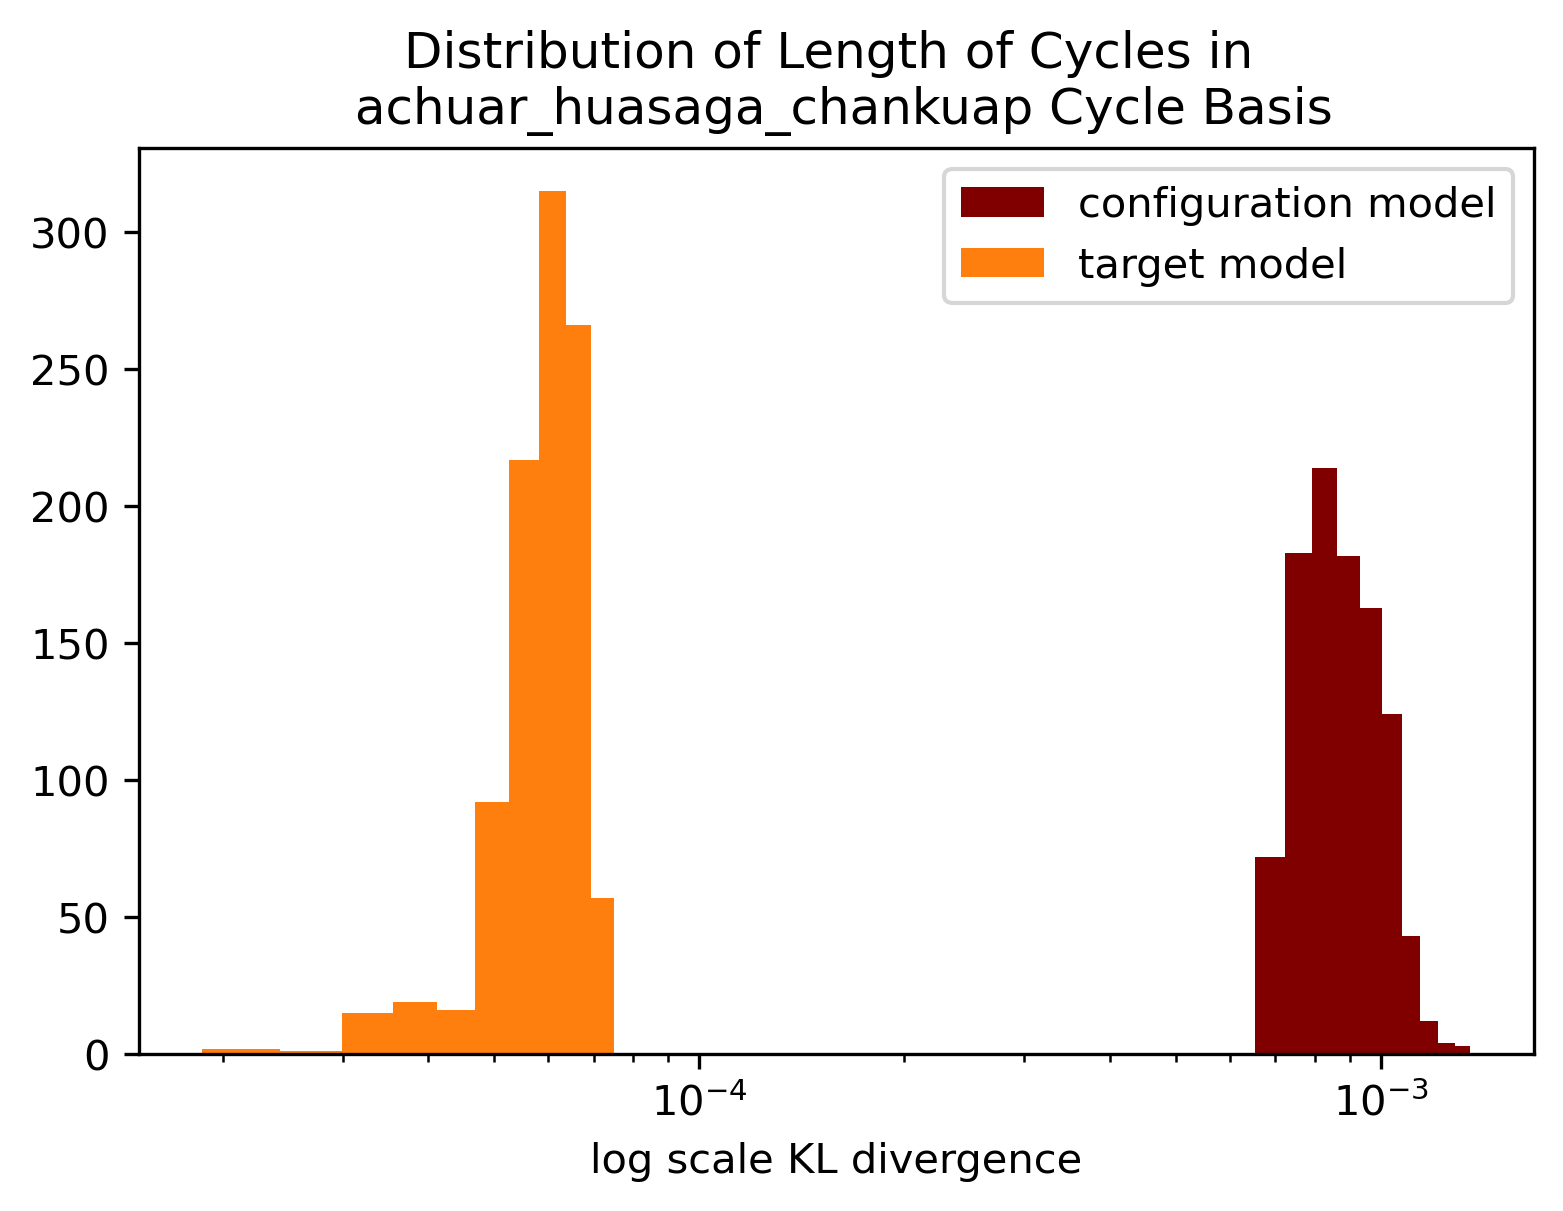

In [34]:
fig = plt.figure(figsize=(6,4), dpi=300)
plt.hist(configuation_KL, color='maroon', label='configuration model', )
plt.hist(tm_KL, color='#ff7f0e', label='target model', )
plt.semilogx()
plt.legend() 
plt.xlabel('log scale KL divergence')
plt.title(f'Distribution of Length of Cycles in \n {name} Cycle Basis')
plt.savefig(os.path.join('cycle_basis_reduced', 'histograms', f'{name}_cycle_basis_KL.png'), format='png')

In [22]:
configuation_KL

[0.0002718250967562051, 0.0002675022889638318]

In [23]:
tm_KL

[5.716824087060214e-05, 5.7169969323873244e-05]

In [8]:
with open(os.path.join(in_dir, name + '_model_cycle_lengths.pkl'), 'rb') as f:
    tm_cycle_lengths = pickle.load(f)
with open(os.path.join(in_dir, name + '_configuration_cycle_lengths.pkl'), 'rb') as f:
    configuration_cycle_lengths = pickle.load(f)
with open(os.path.join(in_dir, name + '_target_cycle_lengths.pkl'), 'rb') as f:
    target_cycle_lengths = pickle.load(f)

# variations on cycle length distributions 

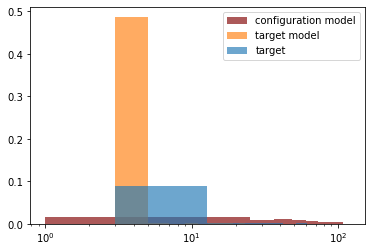

In [9]:
plt.hist(target_cycle_lengths, alpha=alpha, color='#1f77b4', label='target', density=True)
plt.hist(configuration_cycle_lengths[0], alpha=alpha, color='maroon', label='configuration model', density=True)
plt.hist(tm_cycle_lengths[0], alpha=alpha, color='#ff7f0e', label='target model', density=True)
plt.semilogx()
plt.legend()
plt.show()

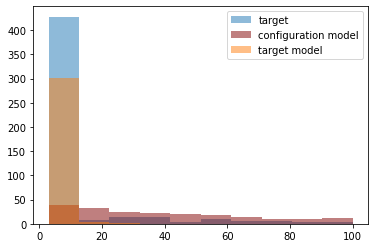

In [32]:
target_counts, target_bins = np.histogram(target_cycle_lengths)
plt.hist(target_bins[:-1], target_bins, weights=target_counts, alpha=0.5, color='#1f77b4', label='target')

configuration_counts, configuration_bins = np.histogram(configuration_cycle_lengths[0], bins=target_bins)
plt.hist(configuration_bins[:-1], configuration_bins, weights=configuration_counts, alpha=0.5, color='maroon', label='configuration model')

tm_counts, tm_bins = np.histogram(tm_cycle_lengths[0], bins=target_bins)
plt.hist(tm_bins[:-1], tm_bins, weights=tm_counts, alpha=0.5, color='#ff7f0e', label='target model')

# plt.semilogy()
# plt.semilogx()
plt.legend()

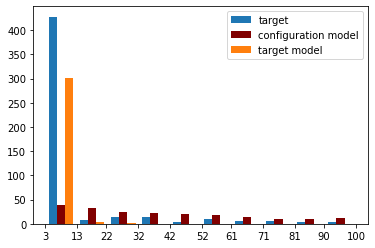

In [44]:
target_counts, target_bins = np.histogram(target_cycle_lengths)

configuration_counts, configuration_bins = np.histogram(configuration_cycle_lengths[0], bins=target_bins)

tm_counts, tm_bins = np.histogram(tm_cycle_lengths[0], bins=target_bins)

plt.hist([target_bins[:-1], configuration_bins[:-1], tm_bins[:-1]],
         target_bins,
        weights=[target_counts, configuration_counts, tm_counts],
        color=['#1f77b4', 'maroon', '#ff7f0e'],
        label=['target', 'configuration model', 'target model'], 
        stacked=False, 
        align='mid')
# plt.hist(target_bins[:-1], target_bins, weights=target_counts, alpha=0.5, color='#1f77b4', label='target')
# plt.hist(configuration_bins[:-1], configuration_bins, weights=configuration_counts, alpha=0.5, color='maroon', label='configuration model')
# plt.hist(tm_bins[:-1], tm_bins, weights=tm_counts, alpha=0.5, color='#ff7f0e', label='target model')

# plt.semilogy()
# plt.semilogx()
plt.xticks([round(x) for x in target_bins])
plt.legend()

In [36]:
target_bins

array([  3. ,  12.7,  22.4,  32.1,  41.8,  51.5,  61.2,  70.9,  80.6,
        90.3, 100. ])

In [90]:
target_counts

array([428,   7,  15,  14,   4,  10,   5,   5,   4,   4], dtype=int64)

# combined 
## run below (make sure that file_names is just a list of real-world target network names without any other formatting or additional characters to save figures like Figure 6.4

In [89]:
alpha=0.65

temp = 'cycle_basis_ver1'
# temp = 'cycle_basis_ver1_reduced'
# temp = 'cycle_basis_ver2'
# temp = 'cycle_basis_ver2_connected'
in_dir = os.path.join(temp, 'pickle_files')
network_pattern = re.compile('^.*(?=(_configuration|_model|_target))')
if not os.path.exists(os.path.join(temp, 'histograms')):
    os.makedirs(os.path.join(temp, 'histograms'))

In [90]:
pickle_lists = glob.glob(in_dir+'/*')
# file_names = [k[33:] for k in pickle_lists]# for old runs
# file_names = [k[20:] for k in pickle_lists]  # for cycle_basis_ver1
# file_names = [k[38:] for k in pickle_lists]  # for cycle_basis_ver1_reduced
file_names = [k[30:] for k in pickle_lists]  # for cycle_basis_ver1
# file_names = [k[40:] for k in pickle_lists]  # for cycle_basis_ver2_connected

file_names = [network_pattern.match(k).group(0) for k in file_names]
file_names = sorted(list(set(file_names)))

In [91]:
file_names[0]

'achuar_huasaga_chankuap'

In [92]:
# temp = 'cycle_basis_ver2_connected'
# infile = 
# outfile = 

# make list of files in infile 
model_KLs = []
configuration_KLs = [] 

for name in file_names: # for file name in file list 
    # find average model KL divergence 
    with open(os.path.join(in_dir, name + '_model_cycle_KL_div.pkl'), 'rb') as f:
        tm_KL = pickle.load(f)
    model_KLs.append(np.median(tm_KL))
    #model_KLs.append(np.mean(tm_KL))
    # find average configuration KL divergence 
    with open(os.path.join(in_dir, name + '_configuration_cycle_KL_div.pkl'),'rb') as f:
        configuration_KL = pickle.load(f)
    configuration_KLs.append(np.median(configuration_KL))
    #configuration_KLs.append(np.mean(configuration_KL))
# then histogram the averages as above. 

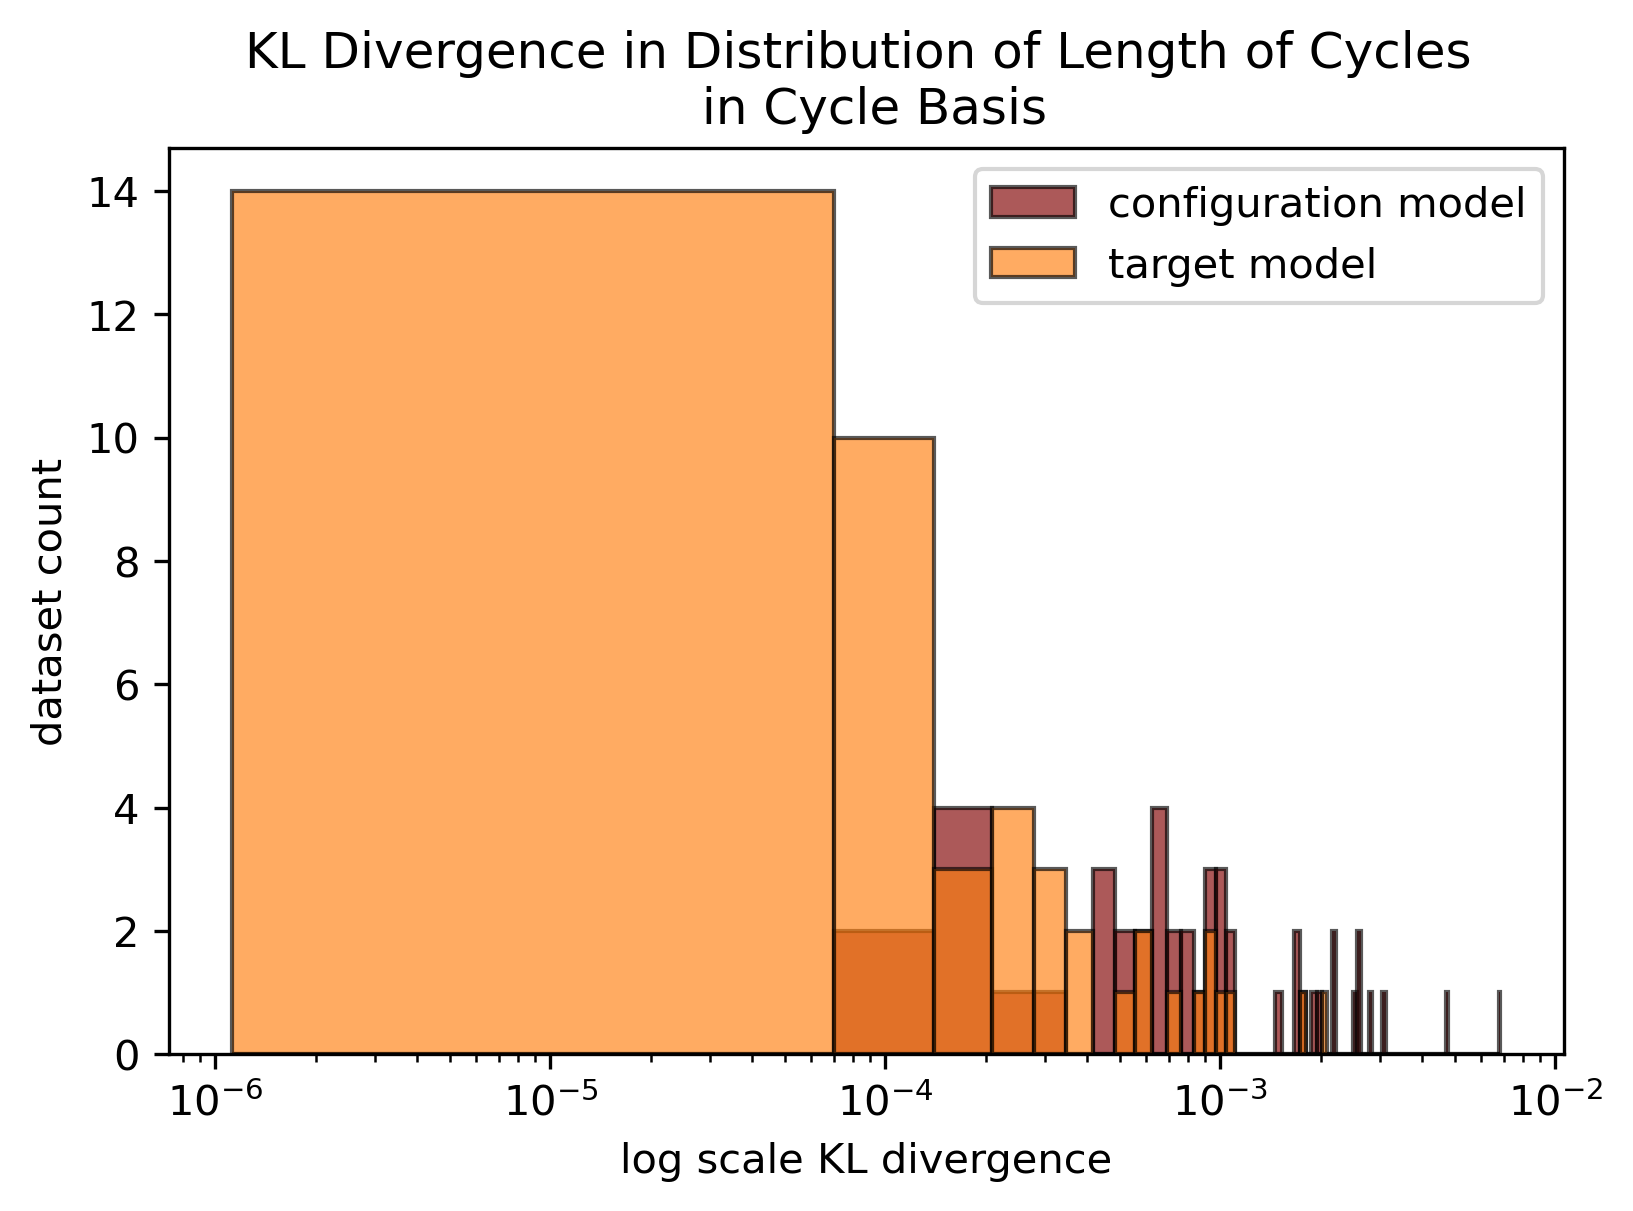

In [93]:
fig = plt.figure(figsize=(6,4), dpi=300)
plt.hist(configuration_KLs, edgecolor='k', color='maroon', label='configuration model', alpha=alpha,  bins = np.linspace(min(model_KLs+configuration_KLs), max(model_KLs+configuration_KLs), 100),)
plt.hist(model_KLs, edgecolor='k', color='#ff7f0e', label='target model', alpha=alpha,  bins = np.linspace(min(model_KLs+configuration_KLs), max(model_KLs+configuration_KLs), 100),)
plt.semilogx()
plt.legend() 
plt.ylabel('dataset count')
plt.xlabel('log scale KL divergence')
plt.title(f'KL Divergence in Distribution of Length of Cycles \n in Cycle Basis')
plt.savefig(os.path.join(temp, 'histograms', f'aa_all_{temp}.png'), format='png')
plt.show()
plt.close(fig)
